In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
from collections import defaultdict, Counter
import re
import string
from wordcloud import WordCloud

In [4]:
amount = int(input('Amount of datasets: '))
DATASET_PATHS = []
for _ in range(amount):
    DATASET_PATHS.append(input('dataset path: '))
DATASET_PATHS

['D:\\Учёба\\магистратура\\диплом\\datasets\\backup-fully-translated-11.05\\translated1.csv',
 'D:\\Учёба\\магистратура\\диплом\\datasets\\backup-fully-translated-11.05\\translated2.csv',
 'D:\\Учёба\\магистратура\\диплом\\datasets\\backup-fully-translated-11.05\\translated3.csv']

### Статистика по сгруппированным классам

Анализирую распределение эмоций...


C:\Users\Админ\AppData\Local\Temp\ipykernel_22772\3471642532.py:43: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\Админ\AppData\Local\Temp\ipykernel_22772\3471642532.py:43: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



Общее количество примеров: 207814
Примеров с конфликтом эмоций: 14076 (6.8%)
Примеров с neutral: 23954 (11.5%)

Детальное распределение:
neutral: 79252 (38.1%)
joy: 51752 (24.9%)
anger: 29350 (14.1%)
surprise: 16489 (7.9%)
sadness: 14560 (7.0%)
fear: 2335 (1.1%)


C:\Users\Админ\AppData\Local\Temp\ipykernel_22772\3471642532.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


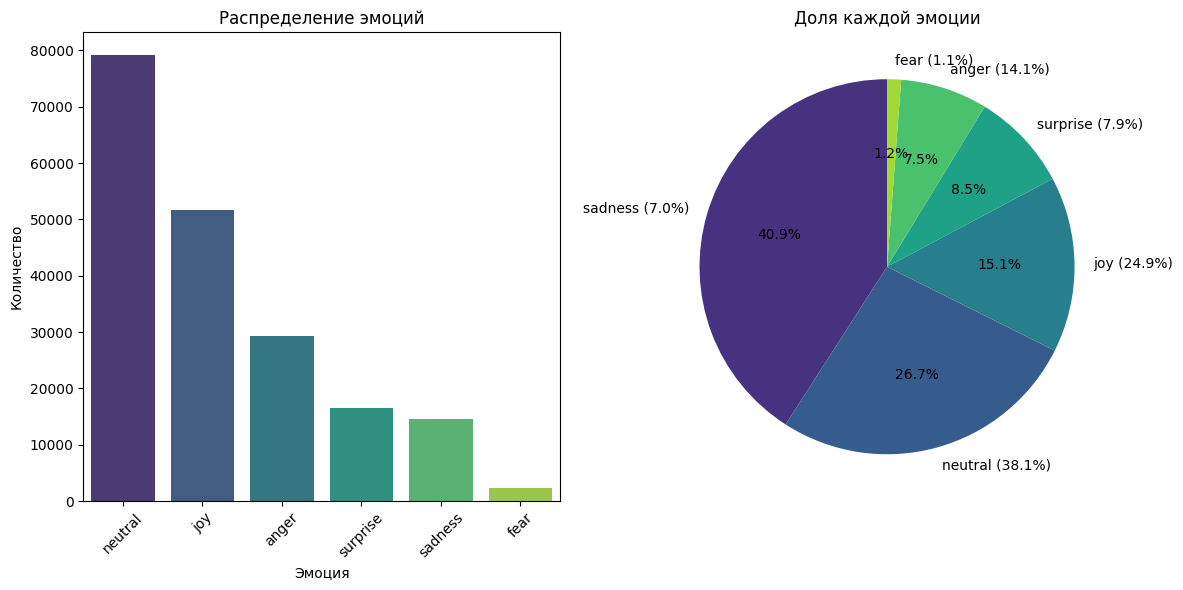

In [5]:
EMOTION_MAPPING = {
    'admiration': 'joy',
    'amusement': 'joy',
    'anger': 'anger',
    'annoyance': 'anger',
    'approval': 'anger',
    'caring': None,
    'confusion': 'surprise',
    'curiosity': None,
    'desire': None,
    'disappointment': 'sadness',
    'disapproval': None,
    'disgust': None,
    'embarrassment': 'sadness',
    'excitement': 'joy',
    'fear': 'fear',
    'gratitude': 'joy',
    'grief': 'sadness',
    'joy': 'joy',
    'love': 'joy',
    'nervousness': None,
    'optimism': 'joy',
    'pride': 'joy',
    'realization': 'surprise',
    'relief': 'surprise',
    'remorse': 'sadness',
    'sadness': 'sadness',
    'surprise': 'surprise',
    'neutral': 'neutral'
}

TARGET_EMOTIONS = ['joy', 'anger', 'fear', 'surprise', 'sadness', 'neutral']

def analyze_emotion_distribution(dataset_paths):
    """Анализирует распределение эмоций в датасете"""
    emotion_counts = defaultdict(int)
    conflict_samples = 0
    neutral_samples = 0
    total_samples = 0

    # Собираем статистику по всем файлам
    for path in dataset_paths:
        df = pd.read_csv(path)
        df = df[df['example_very_unclear'] == False]  # Фильтрация

        for _, row in df.iterrows():
            total_samples += 1
            emotion_candidates = set()

            # Применяем маппинг
            for col, target in EMOTION_MAPPING.items():
                if target is not None and row[col] == 1:
                    emotion_candidates.add(target)

            # Подсчет
            if len(emotion_candidates) == 0:
                emotion_counts['neutral'] += 1
                neutral_samples += 1
            elif len(emotion_candidates) == 1:
                emotion = emotion_candidates.pop()
                emotion_counts[emotion] += 1
            else:
                conflict_samples += 1

    # Расчет процентов
    stats = {
        'total_samples': total_samples,
        'conflict_samples': conflict_samples,
        'neutral_samples': neutral_samples,
        'emotion_distribution': {k: v for k, v in sorted(emotion_counts.items(), key=lambda item: item[1], reverse=True)},
        'percentages': {k: (v / total_samples * 100) for k, v in emotion_counts.items()}
    }

    return stats


def plot_emotion_distribution(stats):
    """Визуализирует распределение эмоций"""
    plt.figure(figsize=(12, 6))

    # График распределения
    plt.subplot(1, 2, 1)
    sns.barplot(
        x=list(stats['emotion_distribution'].keys()),
        y=list(stats['emotion_distribution'].values()),
        palette="viridis"
    )
    plt.title('Распределение эмоций')
    plt.xlabel('Эмоция')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)

    # Круговая диаграмма
    plt.subplot(1, 2, 2)
    plt.pie(
        stats['emotion_distribution'].values(),
        labels=[f"{k} ({v:.1f}%)" for k, v in stats['percentages'].items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("viridis", len(stats['emotion_distribution']))
    )
    plt.title('Доля каждой эмоции')

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':

    print("Анализирую распределение эмоций...")
    stats = analyze_emotion_distribution(DATASET_PATHS)

    # Вывод статистики
    print(f"\nОбщее количество примеров: {stats['total_samples']}")
    print(
        f"Примеров с конфликтом эмоций: {stats['conflict_samples']} ({(stats['conflict_samples']/stats['total_samples']*100):.1f}%)")
    print(
        f"Примеров с neutral: {stats['neutral_samples']} ({(stats['neutral_samples']/stats['total_samples']*100):.1f}%)")

    print("\nДетальное распределение:")
    for emotion, count in stats['emotion_distribution'].items():
        print(f"{emotion}: {count} ({stats['percentages'][emotion]:.1f}%)")

    # Визуализация
    plot_emotion_distribution(stats)

### Статистика по "сырым" классам

Анализ исходного распределения эмоций...


Анализ файлов:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Админ\AppData\Local\Temp\ipykernel_18280\3263900167.py:18: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
Анализ файлов:  33%|███▎      | 1/3 [00:06<00:13,  6.87s/it]C:\Users\Админ\AppData\Local\Temp\ipykernel_18280\3263900167.py:18: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
Анализ файлов: 100%|██████████| 3/3 [00:20<00:00,  6.77s/it]
C:\Users\Админ\AppData\Local\Temp\ipykernel_18280\3263900167.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



Общее количество текстов: 207814

Статистика по эмоциям:
neutral        :  55298 (26.6%)
approval       :  17620 (8.5%)
admiration     :  17131 (8.2%)
annoyance      :  13618 (6.6%)
gratitude      :  11625 (5.6%)
disapproval    :  11424 (5.5%)
curiosity      :   9692 (4.7%)
amusement      :   9245 (4.4%)
realization    :   8785 (4.2%)
optimism       :   8715 (4.2%)
disappointment :   8469 (4.1%)
love           :   8191 (3.9%)
anger          :   8084 (3.9%)
joy            :   7983 (3.8%)
confusion      :   7359 (3.5%)
sadness        :   6758 (3.3%)
caring         :   5999 (2.9%)
excitement     :   5629 (2.7%)
surprise       :   5514 (2.7%)
disgust        :   5301 (2.6%)
desire         :   3817 (1.8%)
fear           :   3197 (1.5%)
remorse        :   2525 (1.2%)
embarrassment  :   2476 (1.2%)
nervousness    :   1810 (0.9%)
pride          :   1302 (0.6%)
relief         :   1289 (0.6%)
grief          :    673 (0.3%)

Распределение по количеству меток:
Текстов с 1 метками: 171820 (82.7%)
Т

C:\Users\Админ\AppData\Local\Temp\ipykernel_18280\3263900167.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Админ\AppData\Local\Temp\ipykernel_18280\3263900167.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


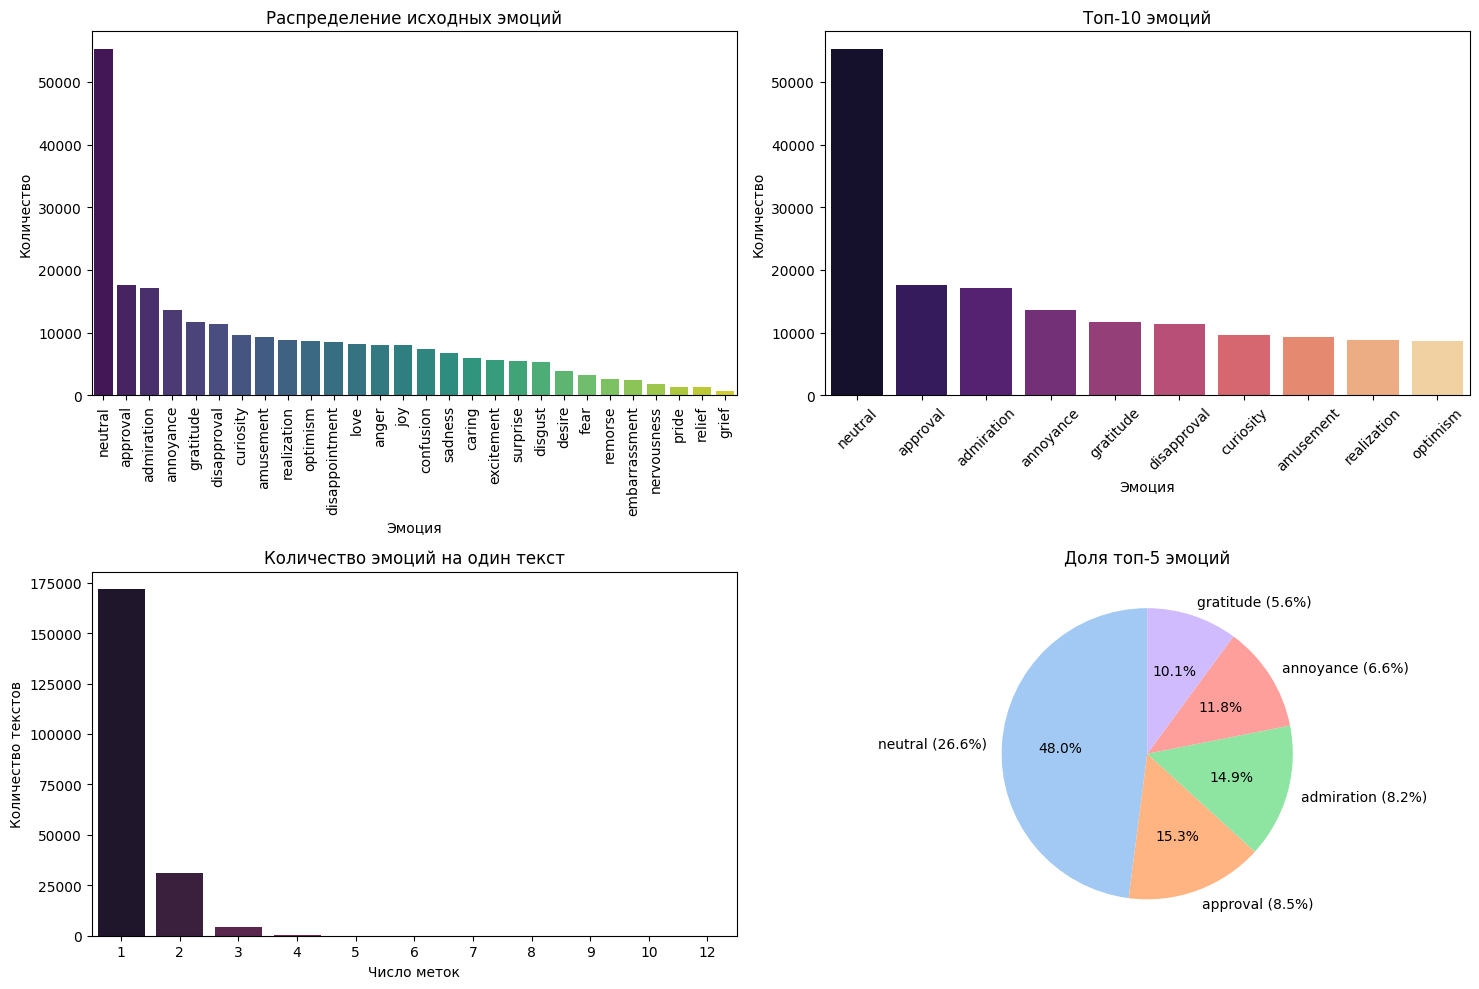

In [11]:
ORIGINAL_EMOTIONS = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval',
    'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
    'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
    'gratitude', 'grief', 'joy', 'love', 'nervousness',
    'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]


def analyze_raw_emotion_distribution(dataset_paths):
    """Анализ исходного распределения эмоций без маппинга"""
    emotion_stats = defaultdict(int)
    multi_label_counts = defaultdict(int)
    total_samples = 0

    for path in tqdm(dataset_paths, desc="Анализ файлов"):
        df = pd.read_csv(path)
        df = df[df['example_very_unclear'] == False]  # Фильтрация

        for _, row in df.iterrows():
            total_samples += 1
            active_emotions = []

            for emotion in ORIGINAL_EMOTIONS:
                if row[emotion] == 1:
                    active_emotions.append(emotion)

            # Статистика по количеству меток
            num_labels = len(active_emotions)
            multi_label_counts[num_labels] += 1

            # Статистика по отдельным эмоциям
            for emotion in active_emotions:
                emotion_stats[emotion] += 1

    return {
        'total_samples': total_samples,
        'emotion_counts': dict(sorted(emotion_stats.items(), key=lambda x: x[1], reverse=True)),
        'multi_label_distribution': dict(sorted(multi_label_counts.items())),
        'emotion_percentages': {k: (v / total_samples * 100) for k, v in emotion_stats.items()}
    }


def plot_raw_emotion_stats(stats):
    """Визуализация результатов"""
    plt.figure(figsize=(15, 10))

    # График распределения эмоций
    plt.subplot(2, 2, 1)
    sns.barplot(
        x=list(stats['emotion_counts'].keys()),
        y=list(stats['emotion_counts'].values()),
        palette="viridis"
    )
    plt.title('Распределение исходных эмоций')
    plt.xlabel('Эмоция')
    plt.ylabel('Количество')
    plt.xticks(rotation=90)

    # Топ-10 эмоций
    plt.subplot(2, 2, 2)
    top_emotions = dict(
        sorted(stats['emotion_counts'].items(), key=lambda x: x[1], reverse=True)[:10])
    sns.barplot(
        x=list(top_emotions.keys()),
        y=list(top_emotions.values()),
        palette="magma"
    )
    plt.title('Топ-10 эмоций')
    plt.xlabel('Эмоция')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)

    # Распределение по количеству меток
    plt.subplot(2, 2, 3)
    sns.barplot(
        x=list(stats['multi_label_distribution'].keys()),
        y=list(stats['multi_label_distribution'].values()),
        palette="rocket"
    )
    plt.title('Количество эмоций на один текст')
    plt.xlabel('Число меток')
    plt.ylabel('Количество текстов')

    # Круговая диаграмма для топ-5
    plt.subplot(2, 2, 4)
    top_5 = dict(sorted(stats['emotion_counts'].items(),
                 key=lambda x: x[1], reverse=True)[:5])
    plt.pie(
        top_5.values(),
        labels=[f"{k} ({v/total_samples*100:.1f}%)" for k, v in top_5.items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel", len(top_5))
    )
    plt.title('Доля топ-5 эмоций')

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    print("Анализ исходного распределения эмоций...")
    stats = analyze_raw_emotion_distribution(DATASET_PATHS)
    total_samples = stats['total_samples']

    print(f"\nОбщее количество текстов: {total_samples}")
    print("\nСтатистика по эмоциям:")
    for emotion, count in stats['emotion_counts'].items():
        print(f"{emotion:<15}: {count:>6} ({count/total_samples*100:.1f}%)")

    print("\nРаспределение по количеству меток:")
    for num_labels, count in stats['multi_label_distribution'].items():
        print(
            f"Текстов с {num_labels} метками: {count} ({count/total_samples*100:.1f}%)")

    plot_raw_emotion_stats(stats)


### Статистика с альтернативной группировкой

Анализ распределения эмоций по новому маппингу...


Анализ файлов:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Админ\AppData\Local\Temp\ipykernel_6004\3149718428.py:52: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
Анализ файлов:  33%|███▎      | 1/3 [00:06<00:13,  6.95s/it]C:\Users\Админ\AppData\Local\Temp\ipykernel_6004\3149718428.py:52: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
Анализ файлов: 100%|██████████| 3/3 [00:20<00:00,  6.78s/it]
C:\Users\Админ\AppData\Local\Temp\ipykernel_6004\3149718428.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Админ\AppData\Local\Temp\ipykernel_6004\3149718428.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As


Общее количество текстов: 207814
Конфликтных случаев (неоднозначные эмоции): 16208 (7.8%)

Распределение по основным категориям:
Радость        :  64839 (31.2%)
Нейтральное    :  61033 (29.4%)
Гнев           :  27685 (13.3%)
Удивление      :  21939 (10.6%)
Грусть         :  11620 (5.6%)
Страх          :   4490 (2.2%)

Топ-10 подкатегорий:
нейтральное    :   5735


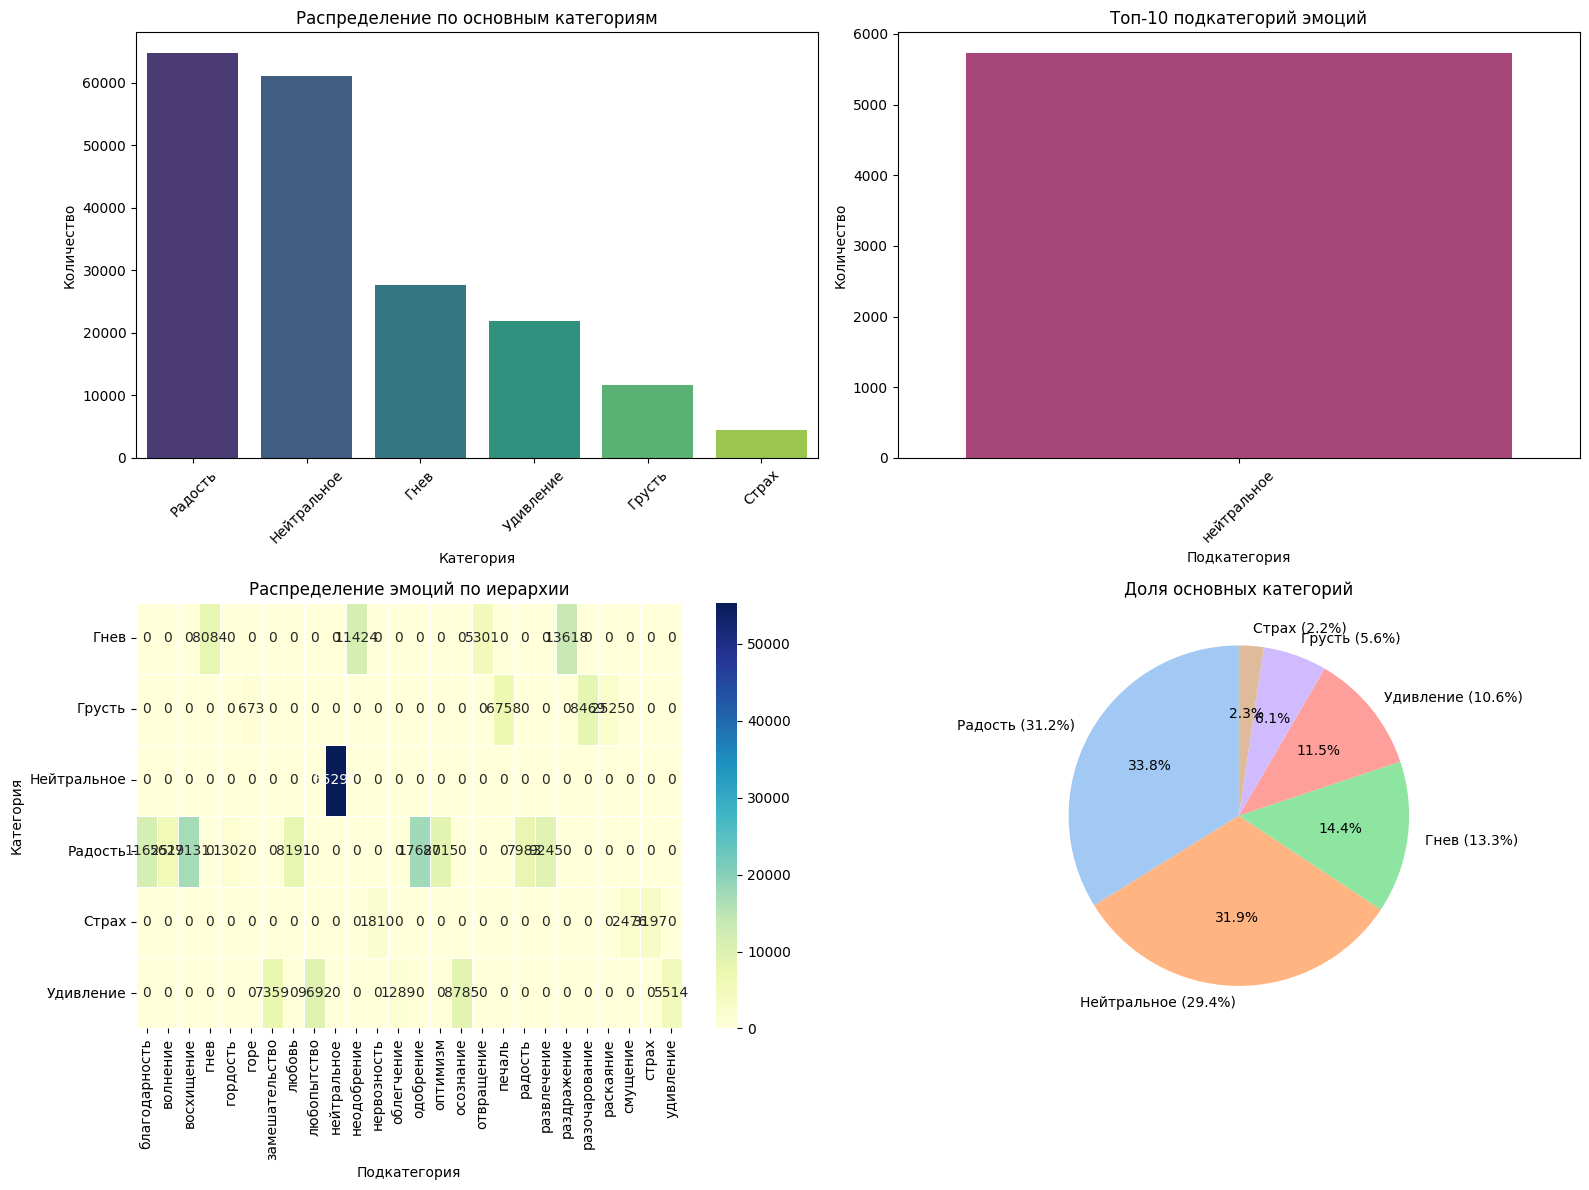

In [5]:
EMOTION_MAPPING = {
    # Радость / Позитивные
    'admiration': ('Радость', 'восхищение'),
    'amusement': ('Радость', 'развлечение'),
    'approval': ('Радость', 'одобрение'),
    'excitement': ('Радость', 'волнение'),
    'gratitude': ('Радость', 'благодарность'),
    'joy': ('Радость', 'радость'),
    'love': ('Радость', 'любовь'),
    'pride': ('Радость', 'гордость'),
    'optimism': ('Радость', 'оптимизм'),
    
    # Грусть / Негативные (пассивные)
    'disappointment': ('Грусть', 'разочарование'),
    'grief': ('Грусть', 'горе'),
    'sadness': ('Грусть', 'печаль'),
    'remorse': ('Грусть', 'раскаяние'),
    
    # Гнев / Негативные (активные)
    'anger': ('Гнев', 'гнев'),
    'annoyance': ('Гнев', 'раздражение'),
    'disapproval': ('Гнев', 'неодобрение'),
    'disgust': ('Гнев', 'отвращение'),
    
    # Страх / Тревога
    'fear': ('Страх', 'страх'),
    'nervousness': ('Страх', 'нервозность'),
    'embarrassment': ('Страх', 'смущение'),
    
    # Удивление / Неопределённость
    'surprise': ('Удивление', 'удивление'),
    'confusion': ('Удивление', 'замешательство'),
    'curiosity': ('Удивление', 'любопытство'),
    'realization': ('Удивление', 'осознание'),
    'relief': ('Удивление', 'облегчение'),
    
    # Нейтральные и исключённые
    'neutral': ('Нейтральное', 'нейтральное'),
    'caring': None,
    'desire': None
}

def analyze_emotion_categories(dataset_paths):
    """Анализ распределения по новому маппингу"""
    category_stats = defaultdict(int)
    subcategory_stats = defaultdict(int)
    emotion_stats = defaultdict(int)
    conflict_samples = 0
    total_samples = 0
    
    for path in tqdm(dataset_paths, desc="Анализ файлов"):
        df = pd.read_csv(path)
        df = df[df['example_very_unclear'] == False]
        
        for _, row in df.iterrows():
            total_samples += 1
            active_categories = set()
            active_subcategories = set()
            
            for col, mapping in EMOTION_MAPPING.items():
                if mapping is not None and row[col] == 1:
                    category, subcategory = mapping
                    active_categories.add(category)
                    active_subcategories.add(subcategory)
                    emotion_stats[(category, subcategory)] += 1
            
            if len(active_categories) == 0:
                category_stats['Нейтральное'] += 1
                subcategory_stats['нейтральное'] += 1
            elif len(active_categories) == 1:
                category_stats[active_categories.pop()] += 1
            else:
                conflict_samples += 1
    
    return {
        'total_samples': total_samples,
        'conflict_samples': conflict_samples,
        'category_stats': dict(sorted(category_stats.items(), key=lambda x: x[1], reverse=True)),
        'subcategory_stats': dict(sorted(subcategory_stats.items(), key=lambda x: x[1], reverse=True)),
        'emotion_stats': emotion_stats
    }

def plot_emotion_hierarchy(stats):
    """Визуализация иерархии эмоций"""
    # Подготовка данных для визуализации
    categories = []
    subcategories = []
    counts = []
    
    for (cat, subcat), count in stats['emotion_stats'].items():
        categories.append(cat)
        subcategories.append(subcat)
        counts.append(count)
    
    df = pd.DataFrame({
        'Категория': categories,
        'Подкатегория': subcategories,
        'Количество': counts
    })
    
    # Создаем фигуру
    plt.figure(figsize=(16, 12))
    
    # 1. Распределение по основным категориям
    plt.subplot(2, 2, 1)
    sns.barplot(
        x=list(stats['category_stats'].keys()),
        y=list(stats['category_stats'].values()),
        palette="viridis"
    )
    plt.title('Распределение по основным категориям')
    plt.xlabel('Категория')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    
    # 2. Топ-10 подкатегорий
    plt.subplot(2, 2, 2)
    top_subcats = sorted(stats['subcategory_stats'].items(), key=lambda x: x[1], reverse=True)[:10]
    sns.barplot(
        x=[k for k, v in top_subcats],
        y=[v for k, v in top_subcats],
        palette="magma"
    )
    plt.title('Топ-10 подкатегорий эмоций')
    plt.xlabel('Подкатегория')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    
    # 3. Тепловая карта категория-подкатегория
    plt.subplot(2, 2, 3)
    pivot_df = df.pivot_table(
        index='Категория',
        columns='Подкатегория',
        values='Количество',
        aggfunc='sum',
        fill_value=0
    )
    sns.heatmap(
        pivot_df,
        annot=True,
        fmt='d',
        cmap="YlGnBu",
        linewidths=.5
    )
    plt.title('Распределение эмоций по иерархии')
    plt.tight_layout()
    
    # 4. Круговая диаграмма для категорий
    plt.subplot(2, 2, 4)
    plt.pie(
        stats['category_stats'].values(),
        labels=[f"{k} ({v/stats['total_samples']*100:.1f}%)" for k, v in stats['category_stats'].items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel", len(stats['category_stats']))
    )
    plt.title('Доля основных категорий')
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    print("Анализ распределения эмоций по новому маппингу...")
    stats = analyze_emotion_categories(DATASET_PATHS)
    
    print(f"\nОбщее количество текстов: {stats['total_samples']}")
    print(f"Конфликтных случаев (неоднозначные эмоции): {stats['conflict_samples']} ({stats['conflict_samples']/stats['total_samples']*100:.1f}%)")
    
    print("\nРаспределение по основным категориям:")
    for category, count in stats['category_stats'].items():
        print(f"{category:<15}: {count:>6} ({count/stats['total_samples']*100:.1f}%)")
    
    print("\nТоп-10 подкатегорий:")
    for subcat, count in sorted(stats['subcategory_stats'].items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{subcat:<15}: {count:>6}")
    
    plot_emotion_hierarchy(stats)

### Статистика по частоте слов

Анализируем частотность слов по эмоциям...


Обработка файлов:   0%|          | 0/3 [00:00<?, ?it/s]C:\Users\Админ\AppData\Local\Temp\ipykernel_22772\3177351856.py:46: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
Анализ D:\Учёба\магистратура\диплом\datasets\backup-fully-translated-11.05\translated1.csv: 100%|██████████| 68871/68871 [00:11<00:00, 6176.71it/s]
Обработка файлов:  33%|███▎      | 1/3 [00:11<00:23, 11.83s/it]C:\Users\Админ\AppData\Local\Temp\ipykernel_22772\3177351856.py:46: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
Анализ D:\Учёба\магистратура\диплом\datasets\backup-fully-translated-11.05\translated2.csv: 100%|██████████| 68907/68907 [00:11<00:00, 6171.62it/s]
Анализ D:\Учёба\магистратура\диплом\datasets\backup-fully-translated-11.05\translated3.csv: 100%|██████████| 70036/70036 [00:11<00:00, 6234.72it/s]
Обработка файлов: 100%|██████████| 3/3 [00:35<00:0


                             СТАТИСТИКА ПО ЭМОЦИЯМ                              

Количество примеров по эмоциям:
neutral             :  55298 примеров
approval            :  17620 примеров
admiration          :  17131 примеров
annoyance           :  13618 примеров
gratitude           :  11625 примеров
disapproval         :  11424 примеров
curiosity           :   9692 примеров
amusement           :   9245 примеров
realization         :   8785 примеров
optimism            :   8715 примеров
disappointment      :   8469 примеров
love                :   8191 примеров
anger               :   8084 примеров
joy                 :   7983 примеров
confusion           :   7359 примеров
sadness             :   6758 примеров
caring              :   5999 примеров
excitement          :   5629 примеров
surprise            :   5514 примеров
disgust             :   5301 примеров
desire              :   3817 примеров
fear                :   3197 примеров
remorse             :   2525 примеров
embarrassme

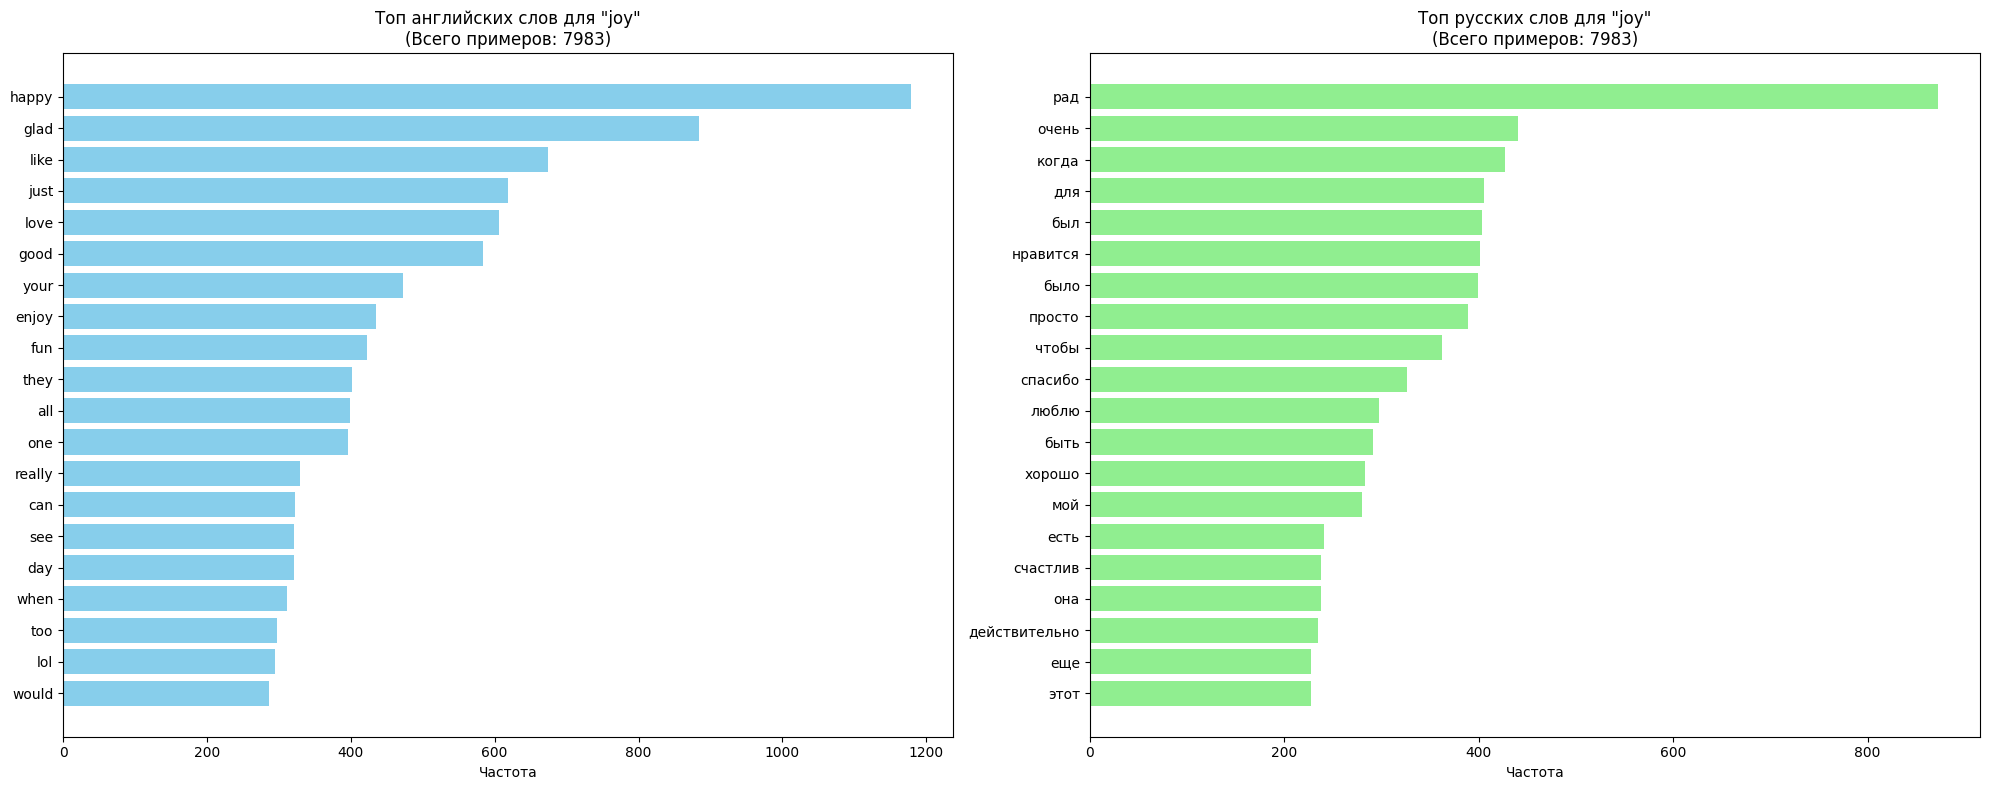

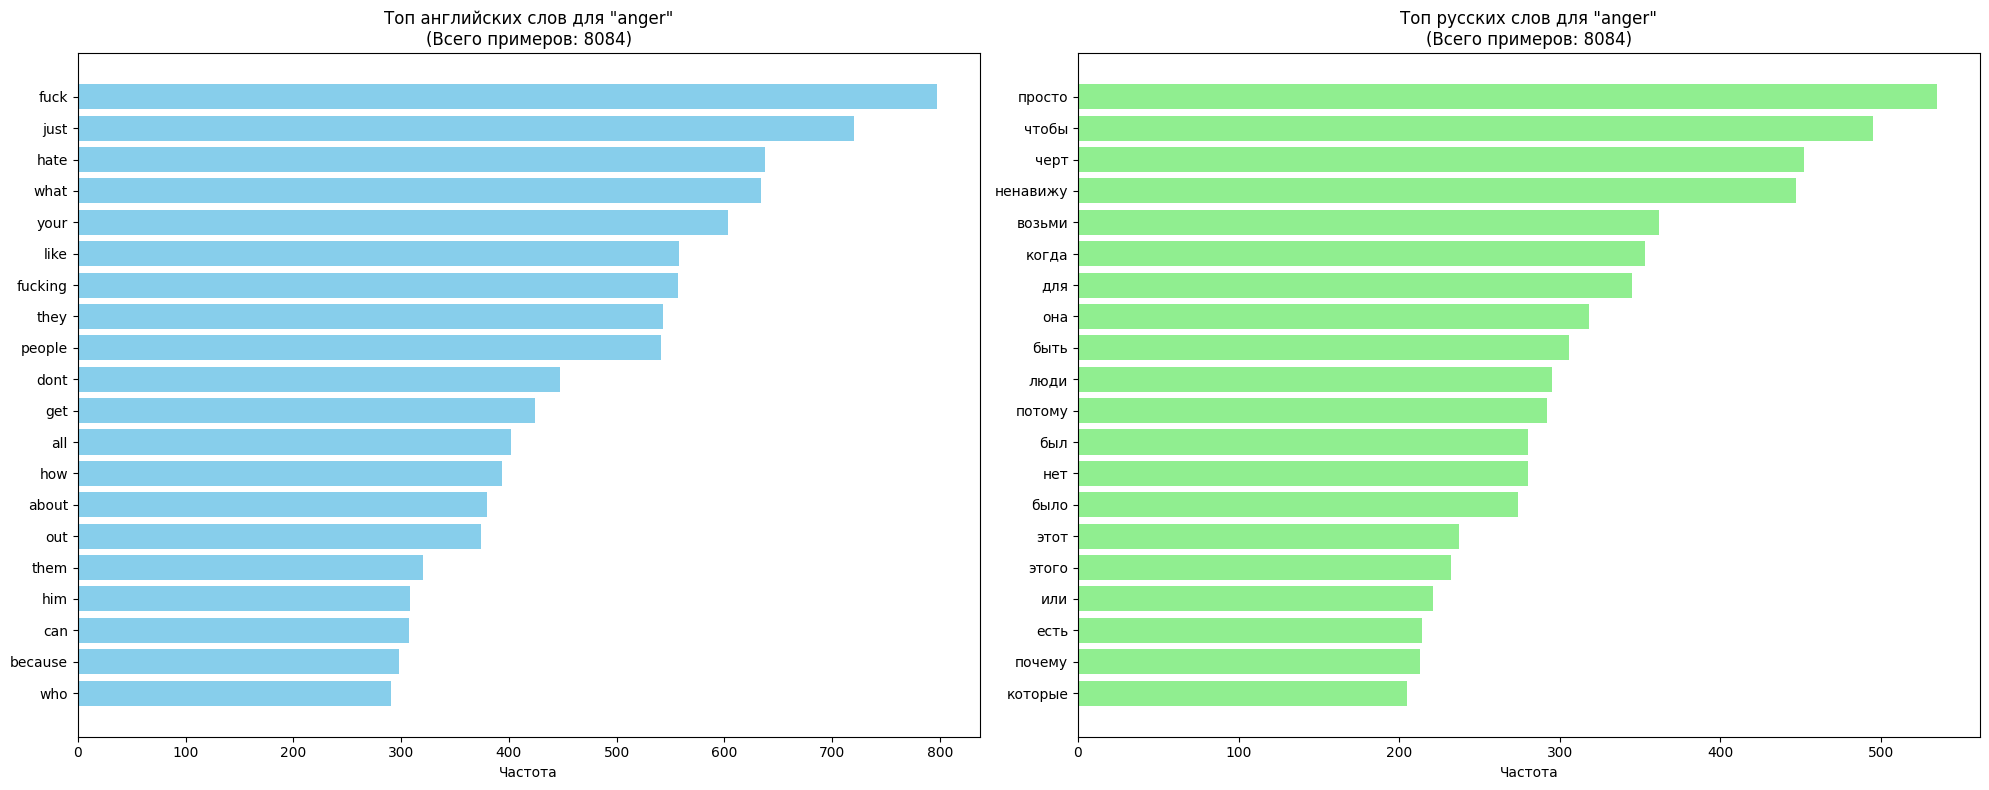

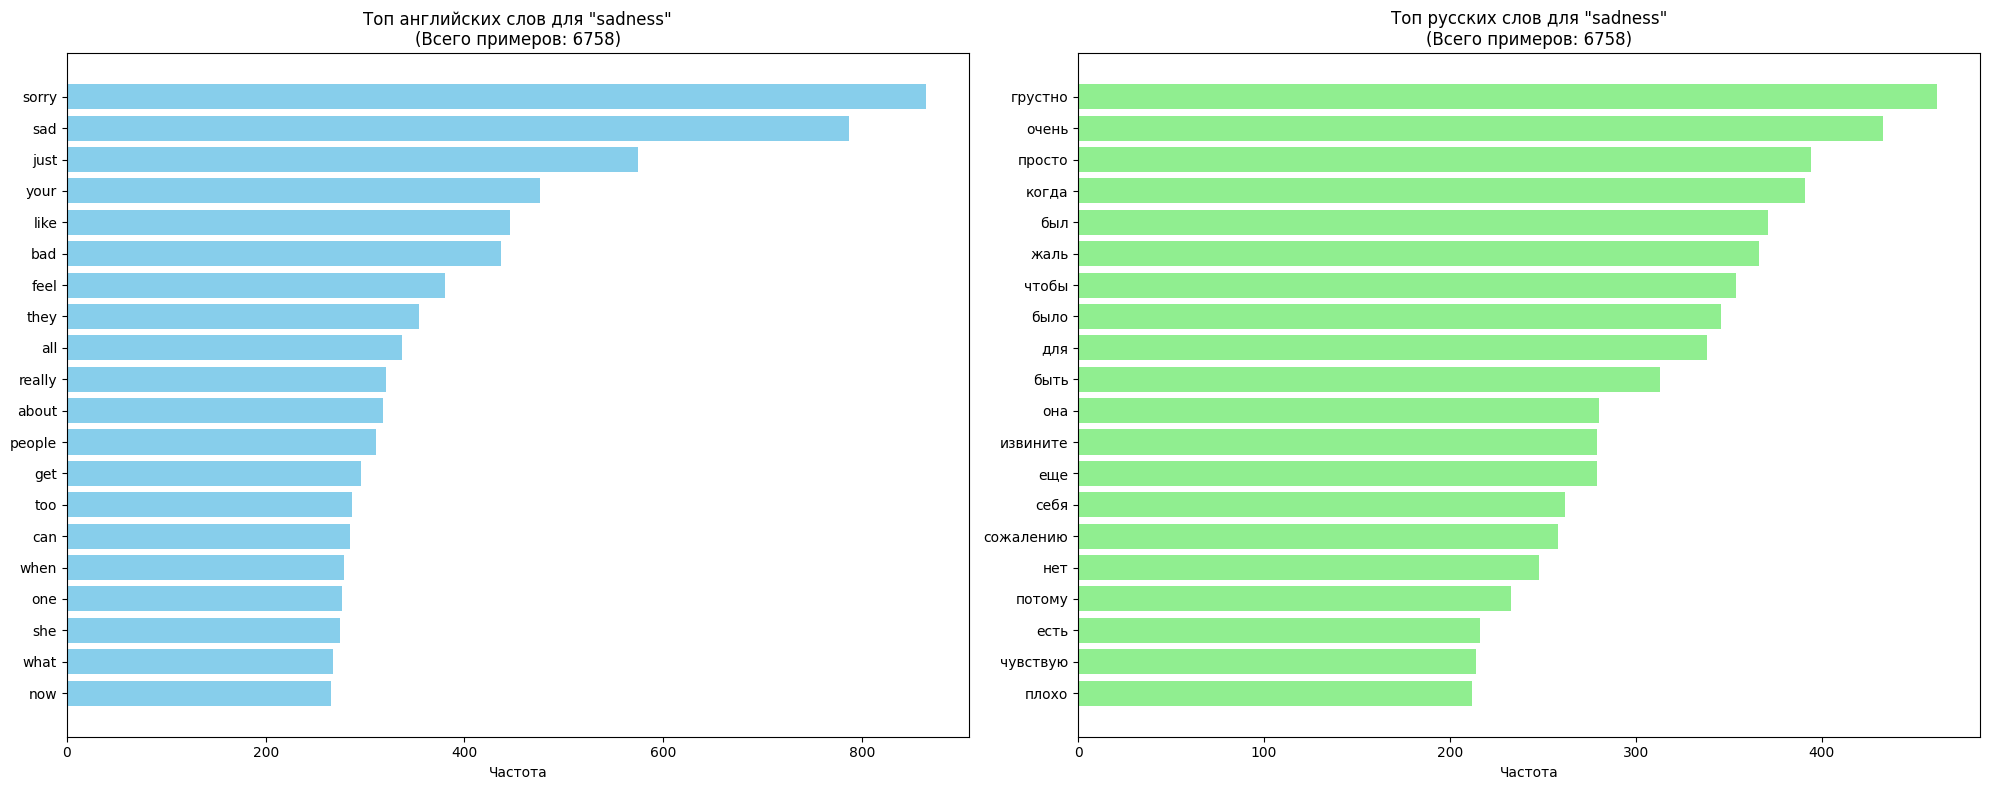

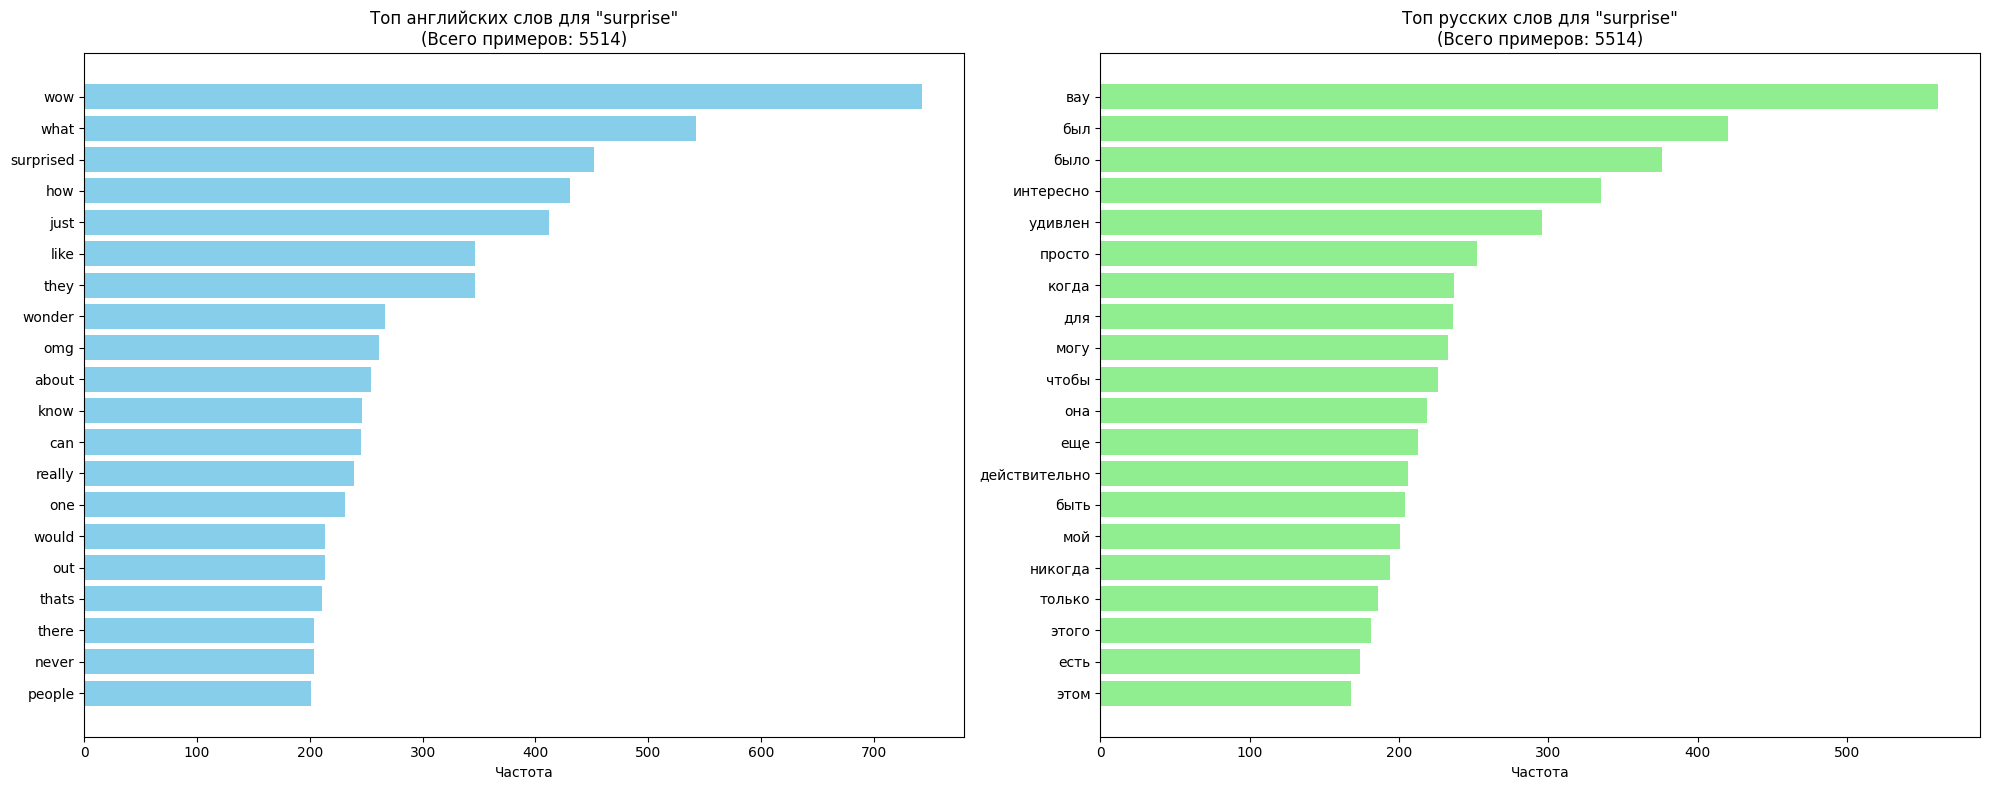

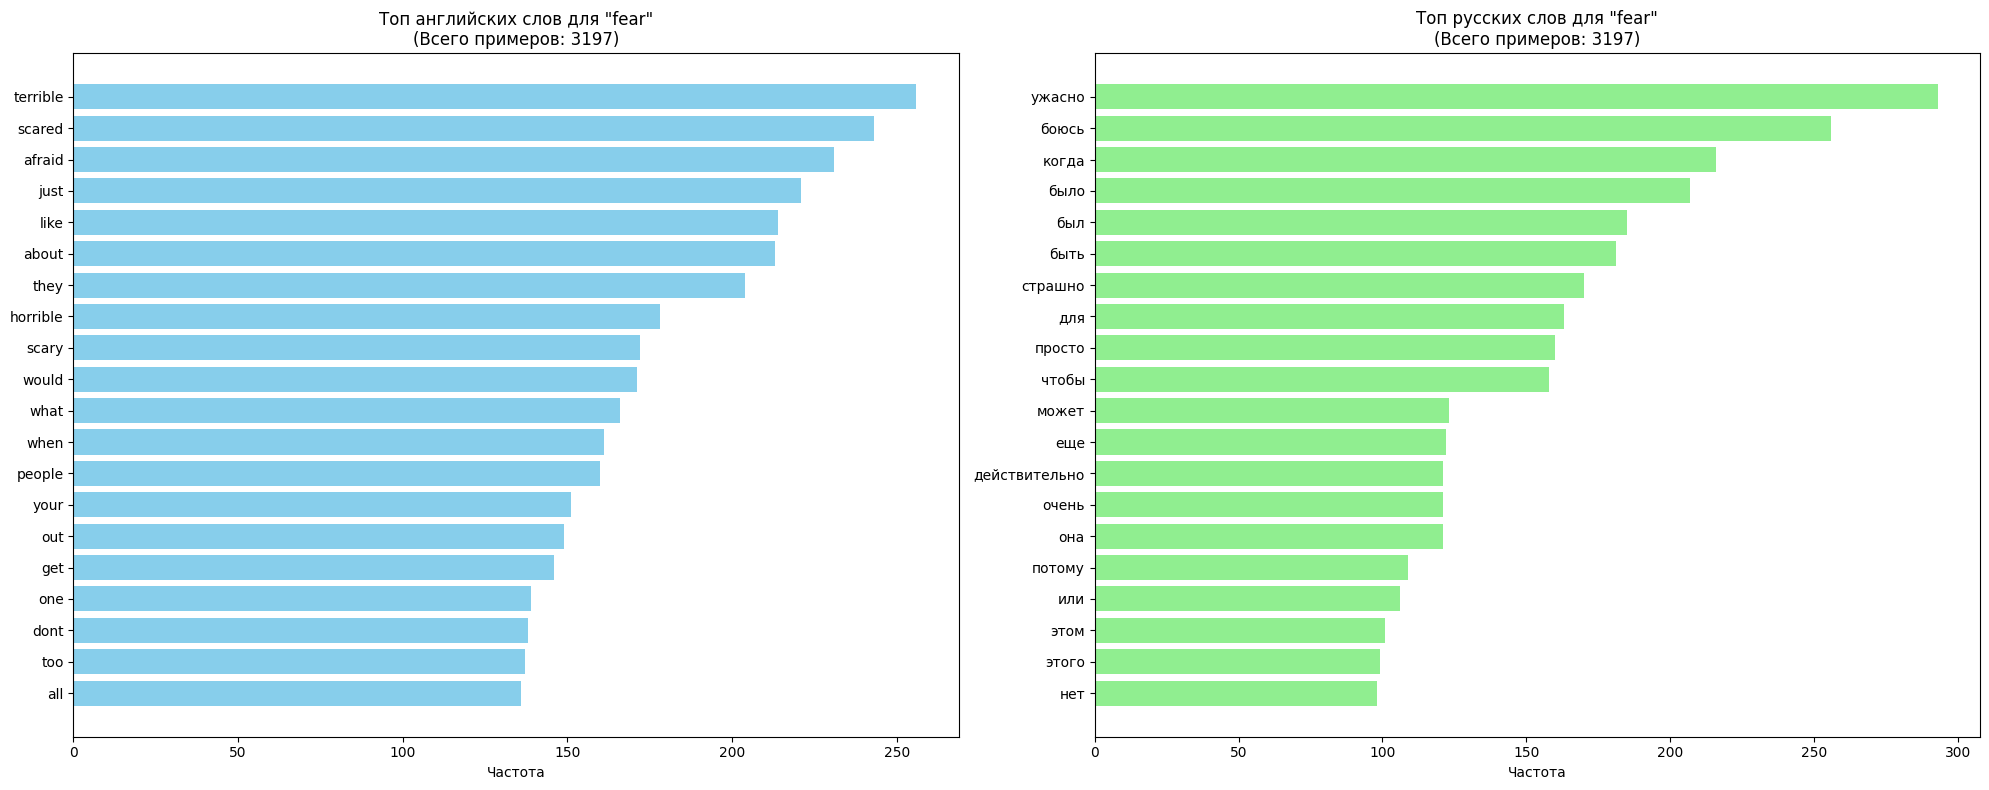

In [9]:
STOP_WORDS = {
    'the', 'and', 'to', 'of', 'a', 'in', 'that', 'it', 'is', 'was', 'for', 'on', 'with', 'this',
    'but', 'at', 'my', 'have', 'be', 'as', 'name', 'you', 'its', 'are', 'not',
    'это', 'и', 'в', 'не', 'на', 'я', 'что', 'но', 'по', 'как', 'у', 'мы', 'мне', 'его', 'если',
    'бы', 'за', 'от', 'о', 'из', 'то', 'же', 'имя', 'так', 'меня', 'все', 'они'
}

# Все исходные эмоции из датасета
ORIGINAL_EMOTIONS = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 
    'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
    'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
    'gratitude', 'grief', 'joy', 'love', 'nervousness',
    'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
]

def preprocess_text(text):
    """Очистка и токенизация текста"""
    if not isinstance(text, str):
        return []
    
    # Удаление URL, упоминаний, HTML-тегов
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Удаление пунктуации и приведение к нижнему регистру
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    # Токенизация и фильтрация
    words = re.findall(r'\b\w+\b', text)
    words = [w for w in words if w not in STOP_WORDS and len(w) > 2 and not w.isdigit()]
    
    return words

def analyze_words_by_emotion(dataset_paths, top_n=20):
    """Анализ частотности слов по эмоциям"""
    # Словари для хранения статистики
    en_word_counts = {emotion: Counter() for emotion in ORIGINAL_EMOTIONS}
    ru_word_counts = {emotion: Counter() for emotion in ORIGINAL_EMOTIONS}
    emotion_sample_counts = Counter()
    
    for path in tqdm(dataset_paths, desc="Обработка файлов"):
        df = pd.read_csv(path)
        df = df[df['example_very_unclear'] == False]
        
        for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Анализ {path}"):
            # Определяем активные эмоции для этого текста
            active_emotions = [emotion for emotion in ORIGINAL_EMOTIONS if row[emotion] == 1]
            
            # Обрабатываем английский текст
            en_words = preprocess_text(row['text'])
            # Обрабатываем русский перевод
            ru_words = preprocess_text(row['translated_text'])
            
            # Обновляем счетчики для каждой эмоции
            for emotion in active_emotions:
                emotion_sample_counts[emotion] += 1
                en_word_counts[emotion].update(en_words)
                ru_word_counts[emotion].update(ru_words)
    
    # Получаем топ-N слов для каждой эмоции
    top_en_words = {emotion: cnt.most_common(top_n) for emotion, cnt in en_word_counts.items()}
    top_ru_words = {emotion: cnt.most_common(top_n) for emotion, cnt in ru_word_counts.items()}
    
    return {
        'emotion_sample_counts': emotion_sample_counts,
        'top_en_words': top_en_words,
        'top_ru_words': top_ru_words
    }

def print_results_to_console(results, top_n=20):
    """Вывод результатов в консоль"""
    print("\n" + "="*80)
    print("СТАТИСТИКА ПО ЭМОЦИЯМ".center(80))
    print("="*80)
    
    # Выводим количество примеров для каждой эмоции
    print("\nКоличество примеров по эмоциям:")
    for emotion, count in results['emotion_sample_counts'].most_common():
        print(f"{emotion:<20}: {count:>6} примеров")
    
    # Выводим топ слов для каждой эмоции
    for emotion in ORIGINAL_EMOTIONS:
        print("\n" + "="*80)
        print(f"Топ {top_n} слов для эмоции: {emotion.upper()}".center(80))
        print(f"(Всего примеров: {results['emotion_sample_counts'][emotion]})".center(80))
        print("="*80)
        
        # Английские слова
        print("\nАнглийские слова:")
        en_words = results['top_en_words'][emotion]
        for i, (word, count) in enumerate(en_words, 1):
            print(f"{i:>2}. {word:<20}: {count:>5}")
        
        # Русские слова
        print("\nРусские слова:")
        ru_words = results['top_ru_words'][emotion]
        for i, (word, count) in enumerate(ru_words, 1):
            print(f"{i:>2}. {word:<20}: {count:>5}")

def visualize_word_distribution(results, emotion, language='both'):
    """Визуализация топовых слов для конкретной эмоции"""
    if language == 'both':
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    else:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    if language in ['en', 'both']:
        data = results['top_en_words'][emotion]
        words = [w[0] for w in data]
        counts = [w[1] for w in data]
        
        if language == 'both':
            ax = ax1
        ax.barh(words[::-1], counts[::-1], color='skyblue')
        ax.set_title(f'Топ английских слов для "{emotion}"\n(Всего примеров: {results["emotion_sample_counts"][emotion]})')
        ax.set_xlabel('Частота')
    
    if language in ['ru', 'both']:
        data = results['top_ru_words'][emotion]
        words = [w[0] for w in data]
        counts = [w[1] for w in data]
        
        if language == 'both':
            ax = ax2
        else:
            ax = ax
        ax.barh(words[::-1], counts[::-1], color='lightgreen')
        ax.set_title(f'Топ русских слов для "{emotion}"\n(Всего примеров: {results["emotion_sample_counts"][emotion]})')
        ax.set_xlabel('Частота')
    
    plt.tight_layout()
    plt.show()

def generate_wordclouds(results, emotion):
    """Генерация облаков слов для эмоции"""
    # Для английского текста
    en_word_freq = dict(results['top_en_words'][emotion])
    ru_word_freq = dict(results['top_ru_words'][emotion])
    
    plt.figure(figsize=(15, 7))
    
    plt.subplot(1, 2, 1)
    wc = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(en_word_freq)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Английские слова для "{emotion}"')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    wc = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(ru_word_freq)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Русские слова для "{emotion}"')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Анализ данных
    print("Анализируем частотность слов по эмоциям...")
    results = analyze_words_by_emotion(DATASET_PATHS)
    
    # Вывод результатов в консоль
    print_results_to_console(results)
    
    # Пример визуализации для нескольких эмоций
    for emotion in ['joy', 'anger', 'sadness', 'surprise', 'fear']:
        visualize_word_distribution(results, emotion)
        # generate_wordclouds(results, emotion)